***a. Loading and preprocessing the image data***

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

11490434/11490434 [==============================] - 0s 0us/step


***b. Defining the model’s architecture***

In [4]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

***c. Training the model***

In [5]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2028 - accuracy: 0.9385
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0850 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0593 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0463 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0360 - accuracy: 0.9878


***d. Estimating the model’s performance***

In [6]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0620 - accuracy: 0.9825
loss=0.062
Accuracy=0.983


<function matplotlib.pyplot.show(close=None, block=None)>

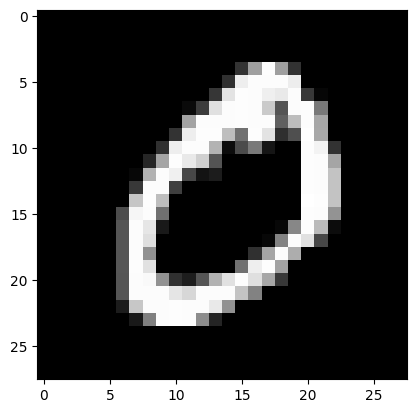

In [8]:
image=x_train[1]
plt.imshow(np.squeeze(image),cmap='gray')  #squeeze remove matrix from input
plt.show

In [9]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model=model.predict([image])
print("predicted class:{}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 96ms/step
predicted class:0
